In this notebook I'll be conducting basic cleaning and consistency checks to the Flights dataframe, in order to ascertain if it's useful and complete enough for further analysis.

In [34]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# setting option to display all columns in dataframe

pd.set_option('display.max_columns', None)

In [4]:
# importing flights dataframe

flights = pd.read_pickle(r"C:\Users\xherr\Desktop\A6 Data Immersion\DATASETS\1. US FLIGHTS 2022.pkl")

In [5]:
# defining a custom formatting function

def float_format(x):
    return f"{x:.1f}"  # Display with 1 decimal place

# Set the display format

pd.options.display.float_format = float_format

In [6]:
# checking descriptive statistics for numerical variables in dataframe

flights.describe()

MONTH  DAY_OF_MONTH  DAY_OF_WEEK  DEP_TIME  DEP_DELAY  DEP_DEL15  \
count 1360935.0     1360935.0    1360935.0 1330473.0  1330471.0  1330471.0   
mean        6.6          15.7          4.0    1406.2       12.9        0.2   
std         3.4           8.8          2.0     498.1       50.2        0.4   
min         1.0           1.0          1.0       1.0      -90.0        0.0   
25%         4.0           8.0          2.0    1007.0       -4.0        0.0   
50%         7.0          16.0          4.0    1403.0       -1.0        0.0   
75%         9.0          23.0          6.0    1833.0       11.0        0.0   
max        12.0          31.0          7.0    2400.0     5995.0        1.0   

       DEP_DELAY_GROUP  TAXI_OUT  WHEELS_OFF  WHEELS_ON   TAXI_IN  ARR_TIME  \
count        1330471.0 1329980.0   1329980.0  1329346.0 1329346.0 1329346.0   
mean               0.2      17.7      1426.8     1529.1       6.9    1527.9   
std                2.2       8.7       502.5      543.8       5.9     551.8   
min               -2.0       1.0         1.0        1.0       1.0       1.0   
25%               -1.0      13.0      1023.0     1142.0       4.0    1144.0   
50%               -1.0      16.0      1417.0     1545.0       5.0    1547.0   
75%                0.0      20.0      1847.0     2009.0       8.0    2011.0   
max               12.0     172.0      2400.0     2400.0     212.0    2400.0   

       ARR_DELAY  ARR_DEL15  ARR_DELAY_GROUP  CANCELLED  DIVERTED  AIR_TIME  \
count  1326525.0  1326525.0        1326525.0  1360935.0 1360935.0 1326525.0   
mean         7.2        0.2             -0.1        0.0       0.0     112.8   
std         52.0        0.4              2.4        0.1       0.0      68.0   
min        -90.0        0.0             -2.0        0.0       0.0       9.0   
25%        -13.0        0.0             -1.0        0.0       0.0      63.0   
50%         -5.0        0.0             -1.0        0.0       0.0      97.0   
75%         10.0        0.0              0.0        0.0       0.0     141.0   
max       5986.0        1.0             12.0        1.0       1.0     624.0   

       DISTANCE  CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  \
count 1360935.0       282576.0       282576.0   282576.0        282576.0   
mean      839.1           28.0            3.8        9.6             0.1   
std       582.4           69.1           30.0       24.8             3.0   
min        67.0            0.0            0.0        0.0             0.0   
25%       409.0            0.0            0.0        0.0             0.0   
50%       715.0           11.0            0.0        0.0             0.0   
75%      1061.0           30.0            0.0       12.0             0.0   
max      4502.0         5986.0         1504.0     1310.0          1132.0   

       LATE_AIRCRAFT_DELAY  
count             282576.0  
mean                  23.2  
std                   54.9  
min                    0.0  
25%                    0.0  
50%                    0.0  
75%                   26.0  
max                 2175.0

All the DELAY reasons columns, their max values are quite shocking and suspicious. For example, CARRIER_DELAY has a max value of 5986 (minutes) which in hours is equivalent to almost 100 hours. Such a long "delay" seems impossible.

## Addressing Mixed Type Data

In [7]:
# checking if the dataframe has any columns with mixed type values

for col in flights.columns.tolist():
  weird = (flights[[col]].applymap(type) != flights[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (flights[weird]) > 0:
    print (col, ' mix')
  else: print (col, ' one type')

MONTH  one type
DAY_OF_MONTH  one type
DAY_OF_WEEK  one type
FL_DATE  one type
MKT_CARRIER  one type
ORIGIN  one type
ORIGIN_CITY_NAME  one type
ORIGIN_STATE_NM  one type
DEST  one type
DEST_CITY_NAME  one type
DEST_STATE_NM  one type
DEP_TIME  one type
DEP_DELAY  one type
DEP_DEL15  one type
DEP_DELAY_GROUP  one type
TAXI_OUT  one type
WHEELS_OFF  one type
WHEELS_ON  one type
TAXI_IN  one type
ARR_TIME  one type
ARR_DELAY  one type
ARR_DEL15  one type
ARR_DELAY_GROUP  one type
CANCELLED  one type
CANCELLATION_CODE  mix
DIVERTED  one type
AIR_TIME  one type
DISTANCE  one type
CARRIER_DELAY  one type
WEATHER_DELAY  one type
NAS_DELAY  one type
SECURITY_DELAY  one type
LATE_AIRCRAFT_DELAY  one type


In [8]:
# turning CANCELLATION_CODE into string, as it has mixed data types at the moment

flights['CANCELLATION_CODE'] = flights['CANCELLATION_CODE'].astype('str')

In [9]:
# turning MONTH, DAY_OF_MONTH, DAY_OF_WEEK, CANCELLED, and DIVERTED columns into string because their values only represent a category

flights['MONTH'] = flights['MONTH'].astype('str')
flights['DAY_OF_MONTH'] = flights['DAY_OF_MONTH'].astype('str')
flights['DAY_OF_WEEK'] = flights['DAY_OF_WEEK'].astype('str')
flights['CANCELLED'] = flights['CANCELLED'].astype('str')
flights['DIVERTED'] = flights['DIVERTED'].astype('str')

In [10]:
# checking that mixed columns have been resolved

for col in flights.columns.tolist():
  weird = (flights[[col]].applymap(type) != flights[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (flights[weird]) > 0:
    print (col, ' mix')
  else: print (col, ' one type')

MONTH  one type
DAY_OF_MONTH  one type
DAY_OF_WEEK  one type
FL_DATE  one type
MKT_CARRIER  one type
ORIGIN  one type
ORIGIN_CITY_NAME  one type
ORIGIN_STATE_NM  one type
DEST  one type
DEST_CITY_NAME  one type
DEST_STATE_NM  one type
DEP_TIME  one type
DEP_DELAY  one type
DEP_DEL15  one type
DEP_DELAY_GROUP  one type
TAXI_OUT  one type
WHEELS_OFF  one type
WHEELS_ON  one type
TAXI_IN  one type
ARR_TIME  one type
ARR_DELAY  one type
ARR_DEL15  one type
ARR_DELAY_GROUP  one type
CANCELLED  one type
CANCELLATION_CODE  one type
DIVERTED  one type
AIR_TIME  one type
DISTANCE  one type
CARRIER_DELAY  one type
WEATHER_DELAY  one type
NAS_DELAY  one type
SECURITY_DELAY  one type
LATE_AIRCRAFT_DELAY  one type


In [11]:
# checking all variables manipulated don't appear in the descriptive statistics

flights.describe()

DEP_TIME  DEP_DELAY  DEP_DEL15  DEP_DELAY_GROUP  TAXI_OUT  WHEELS_OFF  \
count 1330473.0  1330471.0  1330471.0        1330471.0 1329980.0   1329980.0   
mean     1406.2       12.9        0.2              0.2      17.7      1426.8   
std       498.1       50.2        0.4              2.2       8.7       502.5   
min         1.0      -90.0        0.0             -2.0       1.0         1.0   
25%      1007.0       -4.0        0.0             -1.0      13.0      1023.0   
50%      1403.0       -1.0        0.0             -1.0      16.0      1417.0   
75%      1833.0       11.0        0.0              0.0      20.0      1847.0   
max      2400.0     5995.0        1.0             12.0     172.0      2400.0   

       WHEELS_ON   TAXI_IN  ARR_TIME  ARR_DELAY  ARR_DEL15  ARR_DELAY_GROUP  \
count  1329346.0 1329346.0 1329346.0  1326525.0  1326525.0        1326525.0   
mean      1529.1       6.9    1527.9        7.2        0.2             -0.1   
std        543.8       5.9     551.8       52.0        0.4              2.4   
min          1.0       1.0       1.0      -90.0        0.0             -2.0   
25%       1142.0       4.0    1144.0      -13.0        0.0             -1.0   
50%       1545.0       5.0    1547.0       -5.0        0.0             -1.0   
75%       2009.0       8.0    2011.0       10.0        0.0              0.0   
max       2400.0     212.0    2400.0     5986.0        1.0             12.0   

       AIR_TIME  DISTANCE  CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  \
count 1326525.0 1360935.0       282576.0       282576.0   282576.0   
mean      112.8     839.1           28.0            3.8        9.6   
std        68.0     582.4           69.1           30.0       24.8   
min         9.0      67.0            0.0            0.0        0.0   
25%        63.0     409.0            0.0            0.0        0.0   
50%        97.0     715.0           11.0            0.0        0.0   
75%       141.0    1061.0           30.0            0.0       12.0   
max       624.0    4502.0         5986.0         1504.0     1310.0   

       SECURITY_DELAY  LATE_AIRCRAFT_DELAY  
count        282576.0             282576.0  
mean              0.1                 23.2  
std               3.0                 54.9  
min               0.0                  0.0  
25%               0.0                  0.0  
50%               0.0                  0.0  
75%               0.0                 26.0  
max            1132.0               2175.0

## Addressing Missing Values

In [12]:
# checking how many missing values there are per column

flights.isnull().sum()

MONTH                        0
DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
FL_DATE                      0
MKT_CARRIER                  0
ORIGIN                       0
ORIGIN_CITY_NAME             0
ORIGIN_STATE_NM              0
DEST                         0
DEST_CITY_NAME               0
DEST_STATE_NM                0
DEP_TIME                 30462
DEP_DELAY                30464
DEP_DEL15                30464
DEP_DELAY_GROUP          30464
TAXI_OUT                 30955
WHEELS_OFF               30955
WHEELS_ON                31589
TAXI_IN                  31589
ARR_TIME                 31589
ARR_DELAY                34410
ARR_DEL15                34410
ARR_DELAY_GROUP          34410
CANCELLED                    0
CANCELLATION_CODE            0
DIVERTED                     0
AIR_TIME                 34410
DISTANCE                     0
CARRIER_DELAY          1078359
WEATHER_DELAY          1078359
NAS_DELAY              1078359
SECURITY_DELAY         1078359
LATE_AIR

In [13]:
# checking dimensions of dataframe

flights.shape

(1360935, 33)

In [14]:
# creating list of columns to check for missing values

columns_to_check = [
    'DEP_TIME', 'DEP_DELAY', 'DEP_DEL15', 'DEP_DELAY_GROUP',
    'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
    'ARR_TIME', 'ARR_DELAY', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'AIR_TIME'
]

# creating dataframe with rows based on missing values in the above columns

fly_miss = flights[flights[columns_to_check].isna().any(axis=1)]

In [15]:
# printing dataframe

fly_miss

MONTH DAY_OF_MONTH DAY_OF_WEEK                 FL_DATE MKT_CARRIER  \
20         1            1           6    1/1/2022 12:00:00 AM          AA   
26         1            1           6    1/1/2022 12:00:00 AM          AA   
110        1            1           6    1/1/2022 12:00:00 AM          AA   
121        1            1           6    1/1/2022 12:00:00 AM          AA   
138        1            1           6    1/1/2022 12:00:00 AM          AA   
...      ...          ...         ...                     ...         ...   
111656    12           31           6  12/31/2022 12:00:00 AM          UA   
111959    12           31           6  12/31/2022 12:00:00 AM          WN   
112000    12           31           6  12/31/2022 12:00:00 AM          WN   
112086    12           31           6  12/31/2022 12:00:00 AM          WN   
112103    12           31           6  12/31/2022 12:00:00 AM          WN   

       ORIGIN       ORIGIN_CITY_NAME ORIGIN_STATE_NM DEST     DEST_CITY_NAME  \
20        ATL            Atlanta, GA         Georgia  MIA          Miami, FL   
26        ATL            Atlanta, GA         Georgia  ORD        Chicago, IL   
110       DFW  Dallas/Fort Worth, TX           Texas  BNA      Nashville, TN   
121       DFW  Dallas/Fort Worth, TX           Texas  BRO    Brownsville, TX   
138       DFW  Dallas/Fort Worth, TX           Texas  CHA    Chattanooga, TN   
...       ...                    ...             ...  ...                ...   
111656    ORD            Chicago, IL        Illinois  HPN   White Plains, NY   
111959    DEN             Denver, CO        Colorado  BUR        Burbank, CA   
112000    DEN             Denver, CO        Colorado  HOU        Houston, TX   
112086    DEN             Denver, CO        Colorado  RNO           Reno, NV   
112103    DEN             Denver, CO        Colorado  SFO  San Francisco, CA   

       DEST_STATE_NM  DEP_TIME  DEP_DELAY  DEP_DEL15  DEP_DELAY_GROUP  \
20           Florida       NaN        NaN        NaN              NaN   
26          Illinois       NaN        NaN        NaN              NaN   
110        Tennessee    1732.0       47.0        1.0              3.0   
121            Texas       NaN        NaN        NaN              NaN   
138        Tennessee    2147.0       55.0        1.0              3.0   
...              ...       ...        ...        ...              ...   
111656      New York       NaN        NaN        NaN              NaN   
111959    California       NaN        NaN        NaN              NaN   
112000         Texas    2212.0       57.0        1.0              3.0   
112086        Nevada       NaN        NaN        NaN              NaN   
112103    California     947.0       87.0        1.0              5.0   

        TAXI_OUT  WHEELS_OFF  WHEELS_ON  TAXI_IN  ARR_TIME  ARR_DELAY  \
20           NaN         NaN        NaN      NaN       NaN        NaN   
26           NaN         NaN        NaN      NaN       NaN        NaN   
110         22.0      1754.0      954.0      6.0    1000.0        NaN   
121          NaN         NaN        NaN      NaN       NaN        NaN   
138         23.0      2210.0        NaN      NaN       NaN        NaN   
...          ...         ...        ...      ...       ...        ...   
111656       NaN         NaN        NaN      NaN       NaN        NaN   
111959       NaN         NaN        NaN      NaN       NaN        NaN   
112000       9.0      2221.0        NaN      NaN       NaN        NaN   
112086       NaN         NaN        NaN      NaN       NaN        NaN   
112103      19.0      1006.0        NaN      NaN       NaN        NaN   

        ARR_DEL15  ARR_DELAY_GROUP CANCELLED CANCELLATION_CODE DIVERTED  \
20            NaN              NaN       1.0                 A      0.0   
26            NaN              NaN       1.0                 B      0.0   
110           NaN              NaN       0.0               nan      1.0   
121           NaN              NaN       1.0                 A     

In [16]:
# exporting fly_miss dataframe to check in Excel

fly_miss.to_csv(r"C:\Users\xherr\Desktop\A6 Data Immersion\DATASETS\2. MISSING VALUES.csv")

In [17]:
# checking the value counts for the CANCELLLED column

flights['CANCELLED'].value_counts(dropna = False)

0.0    1329748
1.0      31187
Name: CANCELLED, dtype: int64

In [18]:
# checking the value counts for the DIVERTED column

flights['DIVERTED'].value_counts(dropna = False)

0.0    1357713
1.0       3222
Name: DIVERTED, dtype: int64

There are 34,410 rows of data with missing values. 31,187 of them are due to the fact the flights were cancelled, therefore we don't expect them to have data pertaining to the flight. 
The rest are diverted flights. For the sake of simplicity, and because we're focusing on the on-time performance of non-stop flights that haven't been diverted, I will be deleting the rows that correspond to diverted flights, which is a reduction to the dataframe of 0.2%.

In [19]:
# deleting all diverted flights rows from main dataframe

# defining the condition for filtering
condition = (flights['DIVERTED'] != '1.0')

# applying the condition to new dataframe
flights_div = flights[condition]

There is one row that corresponds to a flight that wasn't cancelled or diverted I found in Excel, the following are its conditions and it will be deleted. In total I'll have deleted 3,223 rows of data from out dataframe.

In [20]:
# filtering and displaying the rows that meet the condition

df = flights_div[(flights_div['MONTH'] == '12') & 
                 (flights_div['DAY_OF_MONTH'] == '21') & 
                 (flights_div['DAY_OF_WEEK'] == '3') & 
                 (flights_div['MKT_CARRIER'] == 'F9') & 
                 (flights_div['ORIGIN'] == 'DEN') & 
                 (flights_div['DEST'] == 'LAS') & 
                 (flights_div['DEP_TIME'] == 1951) & 
                 (flights_div['DEP_DELAY'] == -5) & 
                 (flights_div['TAXI_OUT'] == 81) & 
                 (flights_div['WHEELS_OFF'] == 2112) & 
                 (flights_div['CANCELLED'] == '0.0') & 
                 (flights_div['DIVERTED'] == '0.0') & 
                 (flights_div['DISTANCE'] == 628)]

# print df dataframe

df

MONTH DAY_OF_MONTH DAY_OF_WEEK                 FL_DATE MKT_CARRIER  \
75289    12           21           3  12/21/2022 12:00:00 AM          F9   

      ORIGIN ORIGIN_CITY_NAME ORIGIN_STATE_NM DEST DEST_CITY_NAME  \
75289    DEN       Denver, CO        Colorado  LAS  Las Vegas, NV   

      DEST_STATE_NM  DEP_TIME  DEP_DELAY  DEP_DEL15  DEP_DELAY_GROUP  \
75289        Nevada    1951.0       -5.0        0.0             -1.0   

       TAXI_OUT  WHEELS_OFF  WHEELS_ON  TAXI_IN  ARR_TIME  ARR_DELAY  \
75289      81.0      2112.0        NaN      NaN       NaN        NaN   

       ARR_DEL15  ARR_DELAY_GROUP CANCELLED CANCELLATION_CODE DIVERTED  \
75289        NaN              NaN       0.0               nan      0.0   

       AIR_TIME  DISTANCE  CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  \
75289       NaN     628.0            NaN            NaN        NaN   

       SECURITY_DELAY  LATE_AIRCRAFT_DELAY  
75289             NaN                  NaN

In [21]:
# defining the conditions

conditions = (
    (flights_div['MONTH'] == '12') &
    (flights_div['DAY_OF_MONTH'] == '21') &
    (flights_div['DAY_OF_WEEK'] == '3') &
    (flights_div['MKT_CARRIER'] == 'F9') &
    (flights_div['ORIGIN'] == 'DEN') &
    (flights_div['DEST'] == 'LAS') &
    (flights_div['DEP_TIME'] == 1951) &
    (flights_div['DEP_DELAY'] == -5) &
    (flights_div['TAXI_OUT'] == 81) &
    (flights_div['WHEELS_OFF'] == 2112) &
    (flights_div['CANCELLED'] == '0.0') &
    (flights_div['DIVERTED'] == '0.0') &
    (flights_div['DISTANCE'] == 628)
)

# deleting row that meets the conditions

flights_div = flights_div[~conditions]

In [22]:
# checking the shape of our original dataframe and our modified dataframe

flights.shape

(1360935, 33)

In [23]:
flights_div.shape

(1357712, 33)

In [24]:
len(flights) - len(flights_div)

3223

## Addressing Unnecessary Variables

In [25]:
# dropping the DIVERTED column from dataframe as it's not necessary for our analysis

flights_div = flights_div.drop('DIVERTED', axis=1)

In [26]:
flights_div.shape

(1357712, 32)

## Addressing Duplicates

In [27]:
# checking for full duplicates in dataframe

flights_div_dup = flights_div[flights_div.duplicated()]

# print duplicates dataframe

flights_div_dup

MONTH DAY_OF_MONTH DAY_OF_WEEK                 FL_DATE MKT_CARRIER  \
168        1            1           6    1/1/2022 12:00:00 AM          AA   
169        1            1           6    1/1/2022 12:00:00 AM          AA   
228        1            1           6    1/1/2022 12:00:00 AM          AA   
452        1            1           6    1/1/2022 12:00:00 AM          AA   
453        1            1           6    1/1/2022 12:00:00 AM          AA   
...      ...          ...         ...                     ...         ...   
105483    12           29           4  12/29/2022 12:00:00 AM          WN   
105484    12           29           4  12/29/2022 12:00:00 AM          WN   
105485    12           29           4  12/29/2022 12:00:00 AM          WN   
105493    12           29           4  12/29/2022 12:00:00 AM          WN   
111656    12           31           6  12/31/2022 12:00:00 AM          UA   

       ORIGIN       ORIGIN_CITY_NAME ORIGIN_STATE_NM DEST    DEST_CITY_NAME  \
168       DFW  Dallas/Fort Worth, TX           Texas  COU      Columbia, MO   
169       DFW  Dallas/Fort Worth, TX           Texas  COU      Columbia, MO   
228       DFW  Dallas/Fort Worth, TX           Texas  FAR         Fargo, ND   
452       DFW  Dallas/Fort Worth, TX           Texas  ORD       Chicago, IL   
453       DFW  Dallas/Fort Worth, TX           Texas  ORD       Chicago, IL   
...       ...                    ...             ...  ...               ...   
105483    ORD            Chicago, IL        Illinois  DEN        Denver, CO   
105484    ORD            Chicago, IL        Illinois  DEN        Denver, CO   
105485    ORD            Chicago, IL        Illinois  DEN        Denver, CO   
105493    ORD            Chicago, IL        Illinois  PHX       Phoenix, AZ   
111656    ORD            Chicago, IL        Illinois  HPN  White Plains, NY   

       DEST_STATE_NM  DEP_TIME  DEP_DELAY  DEP_DEL15  DEP_DELAY_GROUP  \
168         Missouri       NaN        NaN        NaN              NaN   
169         Missouri       NaN        NaN        NaN              NaN   
228     North Dakota       NaN        NaN        NaN              NaN   
452         Illinois       NaN        NaN        NaN              NaN   
453         Illinois       NaN        NaN        NaN              NaN   
...              ...       ...        ...        ...              ...   
105483      Colorado       NaN        NaN        NaN              NaN   
105484      Colorado       NaN        NaN        NaN              NaN   
105485      Colorado       NaN        NaN        NaN              NaN   
105493       Arizona       NaN        NaN        NaN              NaN   
111656      New York       NaN        NaN        NaN              NaN   

        TAXI_OUT  WHEELS_OFF  WHEELS_ON  TAXI_IN  ARR_TIME  ARR_DELAY  \
168          NaN         NaN        NaN      NaN       NaN        NaN   
169          NaN         NaN        NaN      NaN       NaN        NaN   
228          NaN         NaN        NaN      NaN       NaN        NaN   
452          NaN         NaN        NaN      NaN       NaN        NaN   
453          NaN         NaN        NaN      NaN       NaN        NaN   
...          ...         ...        ...      ...       ...        ...   
105483       NaN         NaN        NaN      NaN       NaN        NaN   
105484       NaN         NaN        NaN      NaN       NaN        NaN   
105485       NaN         NaN        NaN      NaN       NaN        NaN   
105493       NaN         NaN        NaN      NaN       NaN        NaN   
111656       NaN         NaN        NaN      NaN       NaN        NaN   

        ARR_DEL15  ARR_DELAY_GROUP CANCELLED CANCELLATION_CODE  AIR_TIME  \
168           NaN              NaN       1.0                 B       NaN   
169           NaN              NaN       1.0                 B       NaN   
228           NaN              NaN       1.0                 B       NaN   
452           NaN              NaN       1.0                 B       NaN   

In [28]:
# exporting duplicates dataframe to Excel

flights_div_dup.to_csv(r"C:\Users\xherr\Desktop\A6 Data Immersion\DATASETS\3. FLIGHTS DUPLICATE VALUES.csv")

There are seemingly many duplicate rows in this dataframe. After examining in Excel I saw they were all cancelled flights. Because they are all departing from mayor flight hubs, and we don't have the scheduled departure time, it is most reasonable to assume they are not real duplicates. 
Let's also consider that the 4 reasons for cancellations are (in the CANCELLATION_CODE column):
A - Carrier,
B - Weather,
C - National Air System,
D - Security.
These reasons will usually halt a large number of flights at the same time. Considering it all I've decided to leave these rows as they are.

## Formatting Variables

In [29]:
# split the date and time portions within the FL_DATE column

flights_div['FL_DATE'] = flights_div['FL_DATE'].str.split(" ").str[0]

In [30]:
# printing dataframe to see change

flights_div.head(25)

MONTH DAY_OF_MONTH DAY_OF_WEEK   FL_DATE MKT_CARRIER ORIGIN  \
0      1            1           6  1/1/2022          AA    ATL   
1      1            1           6  1/1/2022          AA    ATL   
2      1            1           6  1/1/2022          AA    ATL   
3      1            1           6  1/1/2022          AA    ATL   
4      1            1           6  1/1/2022          AA    ATL   
5      1            1           6  1/1/2022          AA    ATL   
6      1            1           6  1/1/2022          AA    ATL   
7      1            1           6  1/1/2022          AA    ATL   
8      1            1           6  1/1/2022          AA    ATL   
9      1            1           6  1/1/2022          AA    ATL   
10     1            1           6  1/1/2022          AA    ATL   
11     1            1           6  1/1/2022          AA    ATL   
12     1            1           6  1/1/2022          AA    ATL   
13     1            1           6  1/1/2022          AA    ATL   
14     1            1           6  1/1/2022          AA    ATL   
15     1            1           6  1/1/2022          AA    ATL   
16     1            1           6  1/1/2022          AA    ATL   
17     1            1           6  1/1/2022          AA    ATL   
18     1            1           6  1/1/2022          AA    ATL   
19     1            1           6  1/1/2022          AA    ATL   
20     1            1           6  1/1/2022          AA    ATL   
21     1            1           6  1/1/2022          AA    ATL   
22     1            1           6  1/1/2022          AA    ATL   
23     1            1           6  1/1/2022          AA    ATL   
24     1            1           6  1/1/2022          AA    ATL   

   ORIGIN_CITY_NAME ORIGIN_STATE_NM DEST         DEST_CITY_NAME  \
0       Atlanta, GA         Georgia  CLT          Charlotte, NC   
1       Atlanta, GA         Georgia  CLT          Charlotte, NC   
2       Atlanta, GA         Georgia  CLT          Charlotte, NC   
3       Atlanta, GA         Georgia  CLT          Charlotte, NC   
4       Atlanta, GA         Georgia  CLT          Charlotte, NC   
5       Atlanta, GA         Georgia  CLT          Charlotte, NC   
6       Atlanta, GA         Georgia  DCA         Washington, DC   
7       Atlanta, GA         Georgia  DCA         Washington, DC   
8       Atlanta, GA         Georgia  DCA         Washington, DC   
9       Atlanta, GA         Georgia  DFW  Dallas/Fort Worth, TX   
10      Atlanta, GA         Georgia  DFW  Dallas/Fort Worth, TX   
11      Atlanta, GA         Georgia  DFW  Dallas/Fort Worth, TX   
12      Atlanta, GA         Georgia  DFW  Dallas/Fort Worth, TX   
13      Atlanta, GA         Georgia  DFW  Dallas/Fort Worth, TX   
14      Atlanta, GA         Georgia  LAX        Los Angeles, CA   
15      Atlanta, GA         Georgia  LAX        Los Angeles, CA   
16      Atlanta, GA         Georgia  LGA           New York, NY   
17      Atlanta, GA         Georgia  LGA           New York, NY   
18      Atlanta, GA         Georgia  LGA           New York, NY   
19      Atlanta, GA         Georgia  LGA           New York, NY   
20      Atlanta, GA         Georgia  MIA              Miami, FL   
21      Atlanta, GA         Georgia  MIA              Miami, FL   
22      Atlanta, GA         Georgia  MIA              Miami, FL   
23      Atlanta, GA         Georgia  MIA              Miami, FL   
24      Atlanta, GA         Georgia  MIA              Miami, FL   

     DEST_STATE_NM  DEP_TIME  DEP_DELAY  DEP_DEL15  DEP_DELAY_GROUP  TAXI_OUT  \
0   North Carolina     640.0       -5.0        0.0             -1.0      15.0   
1   North Carolina     832.0       -4.0        0.0             -1.0      16.0   
2   North Carolina    1046.0       -5.0        0.0             -1.0      18.0   
3   North Carolina    1251.0       -3.0        0.0             -1.0      21.0   
4   North Carolina    1604.0       -1.0        0.0             -1.0      21.0   
5   North Carolina    2141.0       77.0        1.0       

In [44]:
# Changing variables' data type for columns with 24 hour format OR are boolean

flights_div['DEP_TIME'] = flights_div['DEP_TIME'].astype('str')
flights_div['DEP_DEL15'] = flights_div['DEP_DEL15'].astype('str')
flights_div['WHEELS_OFF'] = flights_div['WHEELS_OFF'].astype('str')
flights_div['WHEELS_ON'] = flights_div['WHEELS_ON'].astype('str')
flights_div['ARR_TIME'] = flights_div['ARR_TIME'].astype('str')
flights_div['ARR_DEL15'] = flights_div['ARR_DEL15'].astype('str')

## Handling Outliers

In [45]:
# checking descriptive statistics 

flights_div.describe()

DEP_DELAY  DEP_DELAY_GROUP  TAXI_OUT   TAXI_IN  ARR_DELAY  \
count  1327248.0        1327248.0 1326757.0 1326525.0  1326525.0   
mean        12.8              0.2      17.7       6.9        7.2   
std         50.1              2.2       8.7       5.9       52.0   
min        -90.0             -2.0       1.0       1.0      -90.0   
25%         -4.0             -1.0      13.0       4.0      -13.0   
50%         -1.0             -1.0      16.0       5.0       -5.0   
75%         11.0              0.0      20.0       8.0       10.0   
max       5995.0             12.0     172.0     212.0     5986.0   

       ARR_DELAY_GROUP  AIR_TIME  DISTANCE  CARRIER_DELAY  WEATHER_DELAY  \
count        1326525.0 1326525.0 1357712.0       282576.0       282576.0   
mean              -0.1     112.8     838.9           28.0            3.8   
std                2.4      68.0     582.3           69.1           30.0   
min               -2.0       9.0      67.0            0.0            0.0   
25%               -1.0      63.0     409.0            0.0            0.0   
50%               -1.0      97.0     715.0           11.0            0.0   
75%                0.0     141.0    1061.0           30.0            0.0   
max               12.0     624.0    4502.0         5986.0         1504.0   

       NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  
count   282576.0        282576.0             282576.0  
mean         9.6             0.1                 23.2  
std         24.8             3.0                 54.9  
min          0.0             0.0                  0.0  
25%          0.0             0.0                  0.0  
50%          0.0             0.0                  0.0  
75%         12.0             0.0                 26.0  
max       1310.0          1132.0               2175.0

<Axes: xlabel='DEP_DELAY', ylabel='DEP_DELAY'>

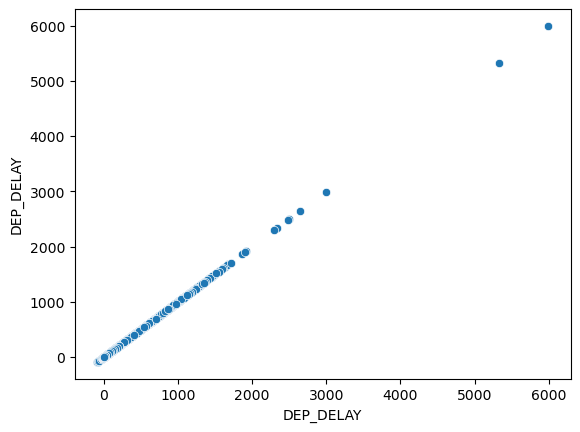

In [35]:
# creating scatterplots for the DEP_DELAY, ARR_DELAY, and CARRIER_DELAY columns, because the max values seem too extreme

sns.scatterplot(x = 'DEP_DELAY', y = 'DEP_DELAY', data = flights_div)

<Axes: xlabel='CARRIER_DELAY', ylabel='CARRIER_DELAY'>

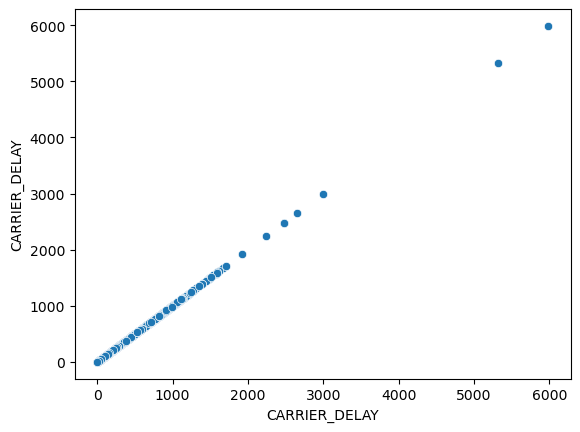

In [37]:
sns.scatterplot(x = 'CARRIER_DELAY', y = 'CARRIER_DELAY', data = flights_div)

<Axes: xlabel='ARR_DELAY', ylabel='ARR_DELAY'>

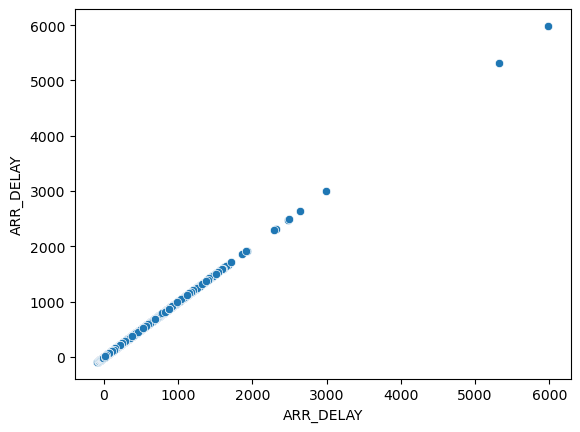

In [38]:
sns.scatterplot(x = 'ARR_DELAY', y = 'ARR_DELAY', data = flights_div)

In [40]:
# locating values above 3,000 for the ARR_DELAY column

flights_div.loc[flights_div['ARR_DELAY'] > 3000]

MONTH DAY_OF_MONTH DAY_OF_WEEK    FL_DATE MKT_CARRIER ORIGIN  \
66762     6           18           6  6/18/2022          AA    DFW   
24467     8            7           7   8/7/2022          AA    ORD   

            ORIGIN_CITY_NAME ORIGIN_STATE_NM DEST  DEST_CITY_NAME  \
66762  Dallas/Fort Worth, TX           Texas  MGM  Montgomery, AL   
24467            Chicago, IL        Illinois  RST   Rochester, MN   

      DEST_STATE_NM  DEP_TIME  DEP_DELAY  DEP_DEL15  DEP_DELAY_GROUP  \
66762       Alabama    1352.0     5327.0        1.0             12.0   
24467     Minnesota    1714.0     5995.0        1.0             12.0   

       TAXI_OUT  WHEELS_OFF  WHEELS_ON  TAXI_IN  ARR_TIME  ARR_DELAY  \
66762      11.0      1403.0     1529.0      9.0    1538.0     5324.0   
24467      13.0      1727.0     1815.0      4.0    1819.0     5986.0   

       ARR_DEL15  ARR_DELAY_GROUP CANCELLED CANCELLATION_CODE  AIR_TIME  \
66762        1.0             12.0       0.0               nan      86.0   
24467        1.0             12.0       0.0               nan      48.0   

       DISTANCE  CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  \
66762     622.0         5324.0            0.0        0.0             0.0   
24467     268.0         5986.0            0.0        0.0             0.0   

       LATE_AIRCRAFT_DELAY  
66762                  0.0  
24467                  0.0

In [43]:
# locating values above 1,800 for the ARR_DELAY column

flights_div.loc[flights_div['DEP_DELAY'] > 1800]

MONTH DAY_OF_MONTH DAY_OF_WEEK     FL_DATE MKT_CARRIER ORIGIN  \
3473       3            2           3    3/2/2022          AA    ATL   
66762      6           18           6   6/18/2022          AA    DFW   
116174     7           31           7   7/31/2022          AA    ATL   
24467      8            7           7    8/7/2022          AA    ORD   
15864      9            5           1    9/5/2022          AA    ORD   
26921      9            8           4    9/8/2022          AA    LAX   
30747      9            9           5    9/9/2022          AA    LAX   
65051     10           18           2  10/18/2022          AA    LAX   
109397    10           30           7  10/30/2022          AA    DEN   
18431     11            6           7   11/6/2022          AA    DEN   
40607     11           12           6  11/12/2022          AA    DEN   

             ORIGIN_CITY_NAME ORIGIN_STATE_NM DEST         DEST_CITY_NAME  \
3473              Atlanta, GA         Georgia  ORD            Chicago, IL   
66762   Dallas/Fort Worth, TX           Texas  MGM         Montgomery, AL   
116174            Atlanta, GA         Georgia  PHL       Philadelphia, PA   
24467             Chicago, IL        Illinois  RST          Rochester, MN   
15864             Chicago, IL        Illinois  PHL       Philadelphia, PA   
26921         Los Angeles, CA      California  ORD            Chicago, IL   
30747         Los Angeles, CA      California  AUS             Austin, TX   
65051         Los Angeles, CA      California  JFK           New York, NY   
109397             Denver, CO        Colorado  DFW  Dallas/Fort Worth, TX   
18431              Denver, CO        Colorado  CLT          Charlotte, NC   
40607              Denver, CO        Colorado  DFW  Dallas/Fort Worth, TX   

         DEST_STATE_NM  DEP_TIME  DEP_DELAY  DEP_DEL15  DEP_DELAY_GROUP  \
3473          Illinois     628.0     2650.0        1.0             12.0   
66762          Alabama    1352.0     5327.0        1.0             12.0   
116174    Pennsylvania     104.0     2493.0        1.0             12.0   
24467        Minnesota    1714.0     5995.0        1.0             12.0   
15864     Pennsylvania     850.0     2335.0        1.0             12.0   
26921         Illinois    2126.0     2291.0        1.0             12.0   
30747            Texas    1643.0     1923.0        1.0             12.0   
65051         New York    2028.0     1863.0        1.0             12.0   
109397           Texas    1603.0     1905.0        1.0             12.0   
18431   North Carolina     851.0     2991.0        1.0             12.0   
40607            Texas      17.0     2477.0        1.0             12.0   

        TAXI_OUT  WHEELS_OFF  WHEELS_ON  TAXI_IN  ARR_TIME  ARR_DELAY  \
3473        14.0       642.0      722.0     13.0     735.0     2647.0   
66762       11.0      1403.0     1529.0      9.0    1538.0     5324.0   
116174      11.0       115.0      244.0      4.0     248.0     2473.0   
24467       13.0      1727.0     1815.0      4.0    1819.0     5986.0   
15864        7.0       857.0     1128.0      7.0    1135.0     2321.0   
26921       34.0      2200.0      326.0      9.0     335.0     2291.0   
30747       20.0      1703.0     2131.0     19.0    2150.0     1924.0   
65051       13.0      2041.0      432.0     19.0     451.0     1858.0   
109397      13.0      1616.0     1838.0     31.0    1909.0     1913.0   
18431       16.0       907.0     1355.0      9.0    1404.0     2996.0   
40607       39.0        56.0      317.0      8.0     325.0     2487.0   

        ARR_DEL15  ARR_DELAY_GROUP CANCELLED CANCELLATION_CODE  AIR_TIME  \
3473          1.0             12.0       0.0               nan     100.0   
66762         1.0             12.0       0.0               nan      86.0   
116174        1.0             12.0       0.0               nan      89.0   
24467         1.0             12.0       0.0               nan      48.0   
15864         1.0             12.0       0.0               

From the information I've found online, such as on American Airlines' website (https://www.aa.com/i18n/customer-service/support/customer-service-plan.jsp) it's suggested overnight delays, and even longer, although rare, are possible, therefore I am hesitant to remove them from the dataframe. 
I will leave them for now, and remove them if deemed necessary for the following tasks. 

In [46]:
# exporting dataframe as pickle file

flights_div.to_pickle(r"C:\Users\xherr\Desktop\A6 Data Immersion\DATASETS\2. US FLIGHTS 2022.pkl")